In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping  
import glob as gb 
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
IMG_SIZE = 224
SEED = 1000
BATCH_SIZE = 16
TRAIN_DIR = 'F:/Training_data'
TEST_DIR = 'F:/Test_data'

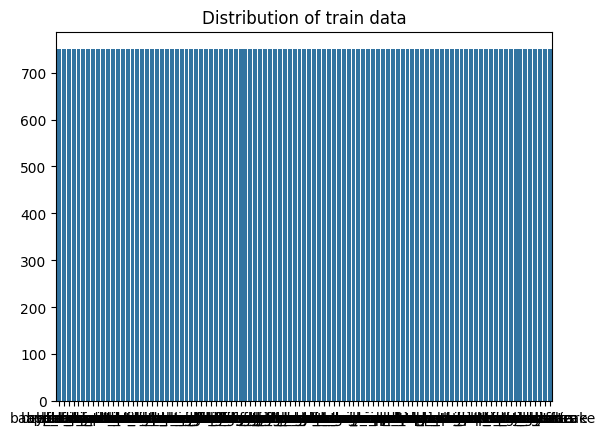

75750

Model: "efficientnetb2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normaliz

In [2]:
import tensorflow as tf
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
tf.compat.v1.nn.fused_batch_norm

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

IMG_SIZE = 224
SEED = 1000
BATCH_SIZE = 16
TRAIN_DIR = 'F:/Training_data'
TEST_DIR = 'F:/Test_data'

categories = []
class_count = []
train_exm = 0
for f in os.listdir(TRAIN_DIR):
    files = os.listdir(os.path.join(TRAIN_DIR, f))
    categories.append(f)
    class_count.append(len(files))
    train_exm += len(files)

sns.barplot(x=categories, y=class_count).set_title("Distribution of train data")
plt.show()
print(train_exm)

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

img_shape = (IMG_SIZE, IMG_SIZE) + (3,)
base_model = tf.keras.applications.EfficientNetB2(input_shape=img_shape, include_top=False, weights='imagenet')
base_model.summary()

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(101, activation='softmax')(x)
model = tf.keras.Model(inputs, output)
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=TRAIN_DIR,
    labels='inferred',
    label_mode='int',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=TEST_DIR,
    labels='inferred',
    label_mode='int',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False,
    seed=SEED
)

h = model.fit(train_data,
              validation_data=test_data,
              epochs=50,
              callbacks=[EarlyStopping(patience=5)],
              verbose=1)
